<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modeling with GuidedLDA
GuidedLDA or SeededLDA implements Latent Dirichlet allocation (LDA) using collapsed gibbs sampling. This Notebook demonstrates visualizing topic models with scatterpie and t-SNE.

In [2]:
!pip install guidedlda
import numpy as np
import guidedlda

     |████████████████████████████████| 2.1MB 2.8MB/s 
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev22-cp36-cp36m-linux_x86_64.whl size=2479738 sha256=13083ec2e29c99aba597c6c98866b777cec0a643fb342f0d3b696bb082851515
  Stored in directory: /root/.cache/pip/wheels/cf/cb/c4/95897cbe4e2e12bd01db3c5cb004c744d2cfd68ecc692ce39e
Successfully built guidedlda


In [0]:
X = guidedlda.datasets.load_data(guidedlda.datasets.NYT)

In [8]:
X

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0]], dtype=int32)

In [0]:
vocab = guidedlda.datasets.load_vocab(guidedlda.datasets.NYT)

In [0]:
word2id = dict((v, idx) for idx, v in enumerate(vocab))

In [17]:
X.shape

(8447, 3012)

In [18]:
# Normal LDA without seeding
model = guidedlda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)
model.fit(X)

INFO:guidedlda:n_documents: 8447
INFO:guidedlda:vocab_size: 3012
INFO:guidedlda:n_words: 1221626
INFO:guidedlda:n_topics: 5
INFO:guidedlda:n_iter: 100
INFO:guidedlda:<0> log likelihood: -11489265
INFO:guidedlda:<20> log likelihood: -9844667
INFO:guidedlda:<40> log likelihood: -9694223
INFO:guidedlda:<60> log likelihood: -9642506
INFO:guidedlda:<80> log likelihood: -9617962
INFO:guidedlda:<99> log likelihood: -9604031


In [0]:
topic_word = model.topic_word_

In [20]:
topic_word

array([[9.77965084e-03, 8.98521811e-03, 3.20351322e-03, ...,
        3.67792932e-08, 7.35953657e-05, 1.76577387e-04],
       [7.86317324e-08, 9.27933074e-04, 2.04521136e-04, ...,
        1.88794789e-04, 1.73068443e-04, 2.36681514e-05],
       [2.15456191e-03, 6.04247804e-04, 9.97680992e-04, ...,
        1.07772591e-04, 6.56190353e-05, 6.09353068e-05],
       [1.22506801e-03, 1.78604709e-04, 3.82083685e-04, ...,
        9.55520659e-05, 3.32625836e-05, 4.15263215e-08],
       [2.60618331e-04, 1.36813087e-03, 4.78024671e-03, ...,
        4.34590092e-05, 5.97459583e-05, 6.51749414e-05]])

In [25]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='pca')
# 13-D -> 2-D
tsne_lda = tsne_model.fit_transform(topic_word) # doc_topic is document-topic matrix from LDA or GuidedLDA 

ERROR! Session/line number was not unique in database. History logging moved to new session 59
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.727325
[t-SNE] KL divergence after 650 iterations: 0.100679


In [26]:
tsne_lda

array([[-313.62994 ,  457.3021  ],
       [ 355.6696  ,  876.6655  ],
       [ 229.22003 ,  440.90268 ],
       [-427.48074 , 1047.2708  ],
       [  37.233295, 1298.0293  ]], dtype=float32)

In [0]:
n_top_words = 8

In [24]:
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
  print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: company percent market business plan pay price increase
Topic 1: game play team win player season second start
Topic 2: life child write man school woman father family
Topic 3: place open small house music turn large play
Topic 4: official state government political states issue leader case


## Topic Modeling with Gensim

`Gensim`, a python library is designed to extract semantic topics from documents efficiently.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [36]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=1IkXuCbJ0Fx_yrvM4wYDl_2UiA_tDXMFw'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1IkXuCbJ0Fx_yrvM4wYDl_2UiA_tDXMFw


In [38]:
# Download the twitter dataset.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitter.csv')

INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1IkXuCbJ0Fx_yrvM4wYDl_2UiA_tDXMFw?alt=json


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('twitter.csv')

In [41]:
df

,Unnamed: 0,Tweet,Matched Keywords,Date,User,Source,Tweet ID,Tweet URL,Predicted_Class
0,0,SIGH...,NaN,2019-11-21 18:13:24,MarilynM,Twitter for Android,1197578773819842560,https://twitter.com/statuses/1197578773819842560,0
1,1,@RepMarkMeadows Giuliani's involvement is susp...,Trump,2019-11-21 18:13:24,Jennydjld,Twitter for iPad,1197578773643890688,https://twitter.com/statuses/1197578773643890688,1
2,2,"And yet another ""electability"" poll which @MSN...",NaN,2019-11-21 18:13:24,Scooterstation,Twitter Web App,1197578775304843270,https://twitter.com/statuses/1197578775304843270,0
3,3,"Similarly, Donald Trump was withholding milita...",Trump,2019-11-21 18:13:24,ahmedqaisi14,Twitter for iPhone,1197578775623536640,https://twitter.com/statuses/1197578775623536640,0
4,4,@VoteBlueIn2020 And Netanyahu! Trump has to b...,Trump,2019-11-21 18:13:24,LoViLu,Twitter for iPhone,1197578776273657858,https://twitter.com/statuses/1197578776273657858,0
...,...,...,...,...,...,...,...,...,...
63199,63199,@CNBC Tulsi Gabbard is doing a great job for T...,Trump,2019-11-21 20:24:21,sQ93118344,Twitter for iPhone,1197611727946493953,https://twitter.com/statuses/1197611727946493953,1
63200,63200,@feliciasonmez STOP LYING There is NO quick pr...,NaN,2019-11-21 20:24:21,SNEntrepreneurs,Twitter Web App,1197611729980661770,https://twitter.com/statuses/1197611729980661770,1
63201,63201,@EmeraldRobinson The Trump War Room is the equ...,Trump,2019-11-21 20:24:21,WMWestmoreland,Twitter for iPhone,1197611730655948800,https://twitter.com/statuses/1197611730655948800,1
63202,63202,"@SamSeder Sam, you have kids, does this handwr...",President,2019-11-21 20:24:21,Gimpygod,Twitter for iPad,1197611729544470528,https://twitter.com/statuses/1197611729544470528,1


### Preprocess the text
It comes with a preprocessing tool to process raw unstructured digital texts.

In [45]:
from gensim.parsing.preprocessing import preprocess_string

# print unprocessed text
print(df.Tweet[1])

@RepMarkMeadows Giuliani's involvement is suspicious-
WHY have you not mentioned GIULIANI in any of your tweets or comments, Mark?
Ignoring that Rudy was the "man on the ground" orchestrating the bribing of Ukraine on Trump's behalf slip your mind??
https://t.co/PM9RN8Kmb6


In [46]:
# print processed text
print(preprocess_string(df.Tweet[1]))

['repmarkmeadow', 'giuliani', 'involv', 'suspici', 'mention', 'giuliani', 'tweet', 'comment', 'mark', 'ignor', 'rudi', 'man', 'ground', 'orchestr', 'bribe', 'ukrain', 'trump', 'behalf', 'slip', 'mind', 'http', 'pmrnkmb']


The link was split into two tokens, the second of which appears meaningless.
We can use preprocess_string and declare a custom filter variable to select only those filters we'd like to use

In [0]:
# import custom filters
from gensim.parsing.preprocessing import strip_tags, strip_numeric, strip_punctuation, stem_text
from gensim.parsing.preprocessing import strip_multiple_whitespaces, strip_non_alphanum, remove_stopwords, strip_short

In [49]:
# define custom filters
CUSTOM_FILTERS = [lambda x:x.lower(), #lowercase
                  strip_multiple_whitespaces, #remove repeating whitespaces
                  strip_numeric, #remove numbers
                  remove_stopwords, #remove stopwords
                  stem_text, #remove words less than minsize=3 characters long
                  strip_short #return porter-stemmed text
                  ]
# process text using custom filters
preprocess_string(df.Tweet[1], CUSTOM_FILTERS)

['@repmarkmeadow',
 "giuliani'",
 'involv',
 'suspicious-',
 'mention',
 'giuliani',
 'tweet',
 'comments,',
 'mark?',
 'ignor',
 'rudi',
 '"man',
 'ground"',
 'orchestr',
 'bribe',
 'ukrain',
 "trump'",
 'behalf',
 'slip',
 'mind??',
 'https://t.co/pmrnkmb']

This looks better! We've preprocessed our text, leaving the link intact.

Gensim requires the tokens to be converted to a dictionary. In this instance, a dictionary is a mapping between the words and their integer IDs.

In [55]:
len(df.Tweet)

63204

In [0]:
docs = []
for i in range(len(df.Tweet)):
  docs.extend(preprocess_string(df.Tweet[i], CUSTOM_FILTERS))

In [68]:
docs

['sigh...',
 '@repmarkmeadow',
 "giuliani'",
 'involv',
 'suspicious-',
 'mention',
 'giuliani',
 'tweet',
 'comments,',
 'mark?',
 'ignor',
 'rudi',
 '"man',
 'ground"',
 'orchestr',
 'bribe',
 'ukrain',
 "trump'",
 'behalf',
 'slip',
 'mind??',
 'https://t.co/pmrnkmb',
 '"electability"',
 'poll',
 '@msnbc',
 'eras',
 "doesn't",
 'fit',
 'pundit',
 'narrative.',
 'similarly,',
 'donald',
 'trump',
 'withhold',
 'militari',
 'aid',
 'ukrain',
 'exchang',
 'investig',
 'bidens/burisma.',
 '#quidproquo',
 '@votebluein',
 'netanyahu!',
 'trump',
 'scared!',
 'question',
 'ethic',
 'trump',
 'camp',
 'decis',
 '#viral',
 'new',
 'now:',
 'fiona',
 'hill',
 'view',
 'serv',
 'trump',
 'risky.',
 'sheâ\x80\x99',
 'impeach',
 'witness.',
 'https://t.co/mulygc',
 '@kitchen',
 'fantasy?',
 'unison',
 'assembl',
 'media',
 'start',
 'swing',
 'boom',
 'mic',
 'swat',
 'trump',
 'head',
 'run',
 'white',
 'hous',
 'like',
 'scare',
 'animal.',
 '@voodudrew',
 "i'v",
 'countri',
 'long',
 'time',


In [0]:
# be sure to split sentence before feed into Dictionary
docs = [d.split() for d in docs]

In [72]:
from gensim import corpora, models, similarities
#create dictionary
dictionary = corpora.Dictionary(docs)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(4909 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(8180 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(10764 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(13303 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(15694 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(17719 unique tokens: ['sigh...', '@repmarkme

In [73]:
print(dictionary)

Dictionary(104017 unique tokens: ['sigh...', '@repmarkmeadow', "giuliani'", 'involv', 'suspicious-']...)


In [0]:
# convert tokenized documents to vectors
corpus = [dictionary.doc2bow(text) for text in docs]

In [77]:
# print human readable output
# notice original word order lost - only word and frequency remain
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('sigh...', 1)],
 [('@repmarkmeadow', 1)],
 [("giuliani'", 1)],
 [('involv', 1)],
 [('suspicious-', 1)]]

Gensim supports different transformations including TF-IDF and LDA.
Latent Dirichlet allocation (LDA) transforms from bag-of-words counts into a topic space of lower dimensionality. LDA's topics can be interpreted as probability distributions over words.

We will first apply TF-IDF to our corpus followed by LDA in an attempt to get quality topics.

In [78]:
# initialize TF-IDF model
tfidf = models.TfidfModel(corpus)

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #10000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #20000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #30000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #40000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #50000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #60000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #70000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #80000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #90000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #100000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #110000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #120000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #130000


In [0]:
# apply transformation to entire corpus
transformed_tfidf = tfidf[corpus]

In [80]:
# LDA on TF-IDF
%time lda = models.LdaMulticore(transformed_tfidf,num_topics=10,id2word=dictionary)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.1
INFO:gensim.models.ldamodel:using symmetric eta at 0.1
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 10 topics, 1 passes over the supplied corpus of 706793 documents, updating every 2000 documents, evaluating every ~20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 1 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/706793, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/706793, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/706793, outstanding queue size 3
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 706793 documents
INFO:gensim.models.ldamodel

CPU times: user 2min 31s, sys: 4.75 s, total: 2min 36s
Wall time: 2min 48s


In [81]:
lda.show_topics()

[(0,
  '0.052*"like" + 0.029*"donald" + 0.021*"time" + 0.020*"look" + 0.019*"support" + 0.019*"hill" + 0.017*"said" + 0.016*"itâ\x80\x99" + 0.012*"fact" + 0.009*"fuck"'),
 (1,
  '0.032*"know" + 0.024*"sai" + 0.021*"need" + 0.017*"person" + 0.015*"run" + 0.014*"work" + 0.013*"america" + 0.012*"come" + 0.009*"dai" + 0.008*"job"'),
 (2,
  '0.016*"believ" + 0.012*"holm" + 0.010*"russia" + 0.009*"pro" + 0.009*"complet" + 0.007*"..." + 0.007*"offici" + 0.007*"commit" + 0.007*"campaign" + 0.007*"truth"'),
 (3,
  '0.300*"trump" + 0.034*"peopl" + 0.030*"trump." + 0.017*"investig" + 0.014*"white" + 0.013*"win" + 0.010*"obama" + 0.010*"russian" + 0.009*"testimoni" + 0.009*"monei"'),
 (4,
  '0.139*"presid" + 0.023*"hear" + 0.023*"@realdonaldtrump" + 0.015*"state" + 0.015*"fiona" + 0.014*"it." + 0.012*"got" + 0.010*"year" + 0.010*"i\'m" + 0.009*"polici"'),
 (5,
  '0.055*"impeach" + 0.020*"don\'t" + 0.016*"try" + 0.016*"foreign" + 0.015*"#impeachmenthear" + 0.012*"call" + 0.011*"nation" + 0.010*"act

In [84]:
!pip install pyldavis

In [86]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


We can see that we have 10 topics. Some of the topics have significant overlap. This can indicate that our topics might not be ideal.
There are several methods we could use to improve our topic segregation. Some potential options are to improve the quality of our pre-processing, change the number of topics, and to add n-grams.

### Viewing the topics of the selected documents

In [0]:
vec_bow_17 = dictionary.doc2bow(docs[17])
vec_bow_03 = dictionary.doc2bow(docs[3])
vec_bow_12 = dictionary.doc2bow(docs[12])

In [90]:
vec_lda_topics_17 = lda[vec_bow_17]
vec_lda_topics_03 = lda[vec_bow_03]
vec_lda_topics_12 = lda[vec_bow_12]
print ('document 03 topics: ', vec_lda_topics_03)
print ('document 12 topics: ', vec_lda_topics_12)
print ('document 17 topics: ', vec_lda_topics_17)

document 03 topics:  [(0, 0.55), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05)]
document 12 topics:  [(0, 0.0500226), (1, 0.05002286), (2, 0.050023034), (3, 0.05002224), (4, 0.0500227), (5, 0.5497951), (6, 0.050023023), (7, 0.050023023), (8, 0.050022393), (9, 0.050023027)]
document 17 topics:  [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.55)]


In [0]:
df1 = pd.DataFrame(vec_lda_topics_03, columns=['topic', 'contrib'])
df1['doc'] = 'doc_03'
df2 = pd.DataFrame(vec_lda_topics_12, columns=['topic', 'contrib'])
df2['doc'] = 'doc_12'
df3 = pd.DataFrame(vec_lda_topics_17, columns=['topic', 'contrib'])
df3['doc'] = 'doc_17'

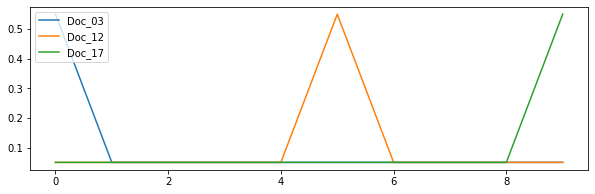

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,3])
plt.plot(df1.topic, df1.contrib)
plt.plot(df2.topic, df2.contrib)
plt.plot(df3.topic, df3.contrib)
plt.legend(['Doc_03', 'Doc_12', 'Doc_17'], loc='upper left')
plt.show()

### Calculating the Cosine Simmilarity between the documents

In [0]:
from gensim import matutils
simmilarity_03_12 = matutils.cossim(vec_lda_topics_03, vec_lda_topics_12)
simmilarity_03_17 = matutils.cossim(vec_lda_topics_03, vec_lda_topics_17)
simmilarity_12_17 = matutils.cossim(vec_lda_topics_12, vec_lda_topics_17)

In [97]:
print('similarity between docs 03 and 12', simmilarity_03_12)
print('similarity between docs 03 and 17', simmilarity_03_17)
print('similarity between docs 12 and 17', simmilarity_12_17)

similarity between docs 03 and 12 0.23087677296683523
similarity between docs 03 and 17 0.2307692377679268
similarity between docs 12 and 17 0.23087743513098177
